In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell

In [2]:
# Libraries Settings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
np.set_printoptions(suppress=True)

def set_seed(seed=42):
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    
pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 60)
pd.set_option("display.max_rows", 25)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [3]:
df_deals = pd.read_excel ('data/Deals (investment).xlsx')
df_deals.head()

,1_post_date,2_post_title,3_amount,4_Stake,5_funding_round,6_investors,7_source,Country/Town,Country(HQ),Category,main_sector,Check vs Companies,"Deals Information, Level of Completeness",duplicated_conc,Duplication,Disclosed,Founded,Total Disclosed Funding,DA Classification_African Company (Yes = 0; No = 1),"funding round, DA","Industry, DA",Year,Month,Quarter,Half,Number of Investors,Investor 1,Investor 2,Investor 3,Investor 4,Investor 5,Investor 6,Investor 7,Investor 8,Investor 9,Investor 10,Investor 11,Investor 12,Investor 13,Investor 14,Investor 15,Cummulative Deals (Disclosed),Cummulative Deals (Undisclosed),Cummulative Amount,Investor 1.1,Investor 2.1,Investor 3.1,Investor 4.1,Investor 5.1,Investor 6.1,Investor 7.1,Investor 8.1,Investor 9.1,Investor 10.1,Investor 11.1,Investor 12.1,Investor 13.1,Investor 14.1,Investor 15.1
0,2008-09-01,biNu,600000,NaN,Seed,Artesian VC,https://www.crunchbase.com/search/funding_roun...,NaN,NaN,NaN,NaN,NaN,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000,9.000,3.000,2.000,1.000,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-11-01,biNu,400000,NaN,Angel,Undisclosed,https://www.crunchbase.com/search/funding_roun...,Australia,Australia,Mobile Internet,Information Technology,biNu,0.900,NaN,NaN,1.000,2008.000,14220000.000,1.000,2. Seed,Other Technologies & Information Technology,2008.000,11.000,4.000,2.000,1.000,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-12-03,AllLife,6000000,NaN,Private Equity,LeapFrog Investments,http://www.prnewswire.co.uk/news-releases/leap...,South Africa,South Africa,"Insurance, InsurTech",Financial Services,AllLife,0.900,NaN,NaN,1.000,2004.000,12700000.000,0.000,6. Private Equity,Financial Services,2009.000,12.000,4.000,2.000,1.000,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-12-11,Bridge International Academies,1800000,NaN,Grant,Omidyar Network,http://foundationcenter.org/pnd/news/story.jht...,NaN,NaN,NaN,NaN,NaN,0.643,NaN,NaN,1.000,NaN,27800000.000,NaN,1. Grant,NaN,2009.000,12.000,4.000,2.000,1.000,Omidyar Network,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,NaN,NaN,NaN,Omidyar Network,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-04-01,biNu,320000,NaN,Angel,Undisclosed,https://www.crunchbase.com/search/funding_roun...,NaN,NaN,NaN,NaN,NaN,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.000,4.000,2.000,1.000,1.000,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(5))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df_deals)

##################### Shape #####################
(2059, 59)
##################### Types #####################
1_post_date        datetime64[ns]
2_post_title               object
3_amount                   object
4_Stake                   float64
5_funding_round            object
                        ...      
Investor 11.1              object
Investor 12.1              object
Investor 13.1              object
Investor 14.1              object
Investor 15.1             float64
Length: 59, dtype: object
##################### Head #####################
  1_post_date                    2_post_title 3_amount  4_Stake 5_funding_round  \
0  2008-09-01                            biNu   600000      NaN            Seed   
1  2008-11-01                            biNu   400000      NaN           Angel   
2  2009-12-03                         AllLife  6000000      NaN  Private Equity   
3  2009-12-11  Bridge International Academies  1800000      NaN           Grant   
4  2010-04-01            

In [5]:
cols = df_deals.columns

In [6]:
cols

Index(['1_post_date', '2_post_title', '3_amount', '4_Stake', '5_funding_round', '6_investors',
       '7_source', 'Country/Town', 'Country(HQ)', 'Category', 'main_sector', 'Check vs Companies',
       'Deals Information, Level of Completeness', 'duplicated_conc', 'Duplication', 'Disclosed ',
       'Founded', 'Total  Disclosed Funding',
       'DA Classification_African Company (Yes = 0; No = 1)', 'funding round, DA', 'Industry, DA',
       'Year', 'Month', 'Quarter', 'Half', 'Number of Investors', 'Investor 1', 'Investor 2',
       'Investor 3', 'Investor 4', 'Investor 5', 'Investor 6', 'Investor 7', 'Investor 8',
       'Investor 9', 'Investor 10', 'Investor 11', 'Investor 12', 'Investor 13', 'Investor 14',
       'Investor 15', 'Cummulative Deals (Disclosed)', 'Cummulative Deals (Undisclosed)',
       'Cummulative Amount', 'Investor 1.1', 'Investor 2.1', 'Investor 3.1', 'Investor 4.1',
       'Investor 5.1', 'Investor 6.1', 'Investor 7.1', 'Investor 8.1', 'Investor 9.1',
       'Inv

In [7]:
for cat_col in cols:
    print(f"{cat_col}: {df_deals[cat_col].nunique()} uniqueness variable")

1_post_date: 695 uniqueness variable
2_post_title: 800 uniqueness variable
3_amount: 281 uniqueness variable
4_Stake: 7 uniqueness variable
5_funding_round: 27 uniqueness variable
6_investors: 717 uniqueness variable
7_source: 1070 uniqueness variable
Country/Town: 34 uniqueness variable
Country(HQ): 34 uniqueness variable
Category: 660 uniqueness variable
main_sector: 48 uniqueness variable
Check vs Companies: 727 uniqueness variable
Deals Information, Level of Completeness: 6 uniqueness variable
duplicated_conc: 1120 uniqueness variable
Duplication: 1 uniqueness variable
Disclosed : 2 uniqueness variable
Founded: 23 uniqueness variable
Total  Disclosed Funding: 280 uniqueness variable
DA Classification_African Company (Yes = 0; No = 1): 2 uniqueness variable
funding round, DA: 8 uniqueness variable
Industry, DA: 13 uniqueness variable
Year: 14 uniqueness variable
Month: 12 uniqueness variable
Quarter: 4 uniqueness variable
Half: 2 uniqueness variable
Number of Investors: 12 uniquenes

In [8]:
df_deals = df_deals.drop(['Investor 13.1','Investor 14.1','Investor 15.1','Investor 15','Duplication'], axis=1)

In [9]:
df_deals.shape

(2059, 54)

In [10]:
df_deals.head(20)

,1_post_date,2_post_title,3_amount,4_Stake,5_funding_round,6_investors,7_source,Country/Town,Country(HQ),Category,main_sector,Check vs Companies,"Deals Information, Level of Completeness",duplicated_conc,Disclosed,Founded,Total Disclosed Funding,DA Classification_African Company (Yes = 0; No = 1),"funding round, DA","Industry, DA",Year,Month,Quarter,Half,Number of Investors,Investor 1,Investor 2,Investor 3,Investor 4,Investor 5,Investor 6,Investor 7,Investor 8,Investor 9,Investor 10,Investor 11,Investor 12,Investor 13,Investor 14,Cummulative Deals (Disclosed),Cummulative Deals (Undisclosed),Cummulative Amount,Investor 1.1,Investor 2.1,Investor 3.1,Investor 4.1,Investor 5.1,Investor 6.1,Investor 7.1,Investor 8.1,Investor 9.1,Investor 10.1,Investor 11.1,Investor 12.1
0,2008-09-01,biNu,600000,NaN,Seed,Artesian VC,https://www.crunchbase.com/search/funding_roun...,NaN,NaN,NaN,NaN,NaN,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000,9.000,3.000,2.000,1.000,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-11-01,biNu,400000,NaN,Angel,Undisclosed,https://www.crunchbase.com/search/funding_roun...,Australia,Australia,Mobile Internet,Information Technology,biNu,0.900,NaN,1.000,2008.000,14220000.000,1.000,2. Seed,Other Technologies & Information Technology,2008.000,11.000,4.000,2.000,1.000,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-12-03,AllLife,6000000,NaN,Private Equity,LeapFrog Investments,http://www.prnewswire.co.uk/news-releases/leap...,South Africa,South Africa,"Insurance, InsurTech",Financial Services,AllLife,0.900,NaN,1.000,2004.000,12700000.000,0.000,6. Private Equity,Financial Services,2009.000,12.000,4.000,2.000,1.000,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-12-11,Bridge International Academies,1800000,NaN,Grant,Omidyar Network,http://foundationcenter.org/pnd/news/story.jht...,NaN,NaN,NaN,NaN,NaN,0.643,NaN,1.000,NaN,27800000.000,NaN,1. Grant,NaN,2009.000,12.000,4.000,2.000,1.000,Omidyar Network,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Omidyar Network,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-04-01,biNu,320000,NaN,Angel,Undisclosed,https://www.crunchbase.com/search/funding_roun...,NaN,NaN,NaN,NaN,NaN,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.000,4.000,2.000,1.000,1.000,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2010-08-20,Kopo Kopo,75000,NaN,Seed,First Light Ventures,https://www.crunchbase.com/organization/kopo-k...,Kenya,Kenya,"Enterprise Software, Financial Services, Infor...",Financial Services,Kopo Kopo,0.900,40410Kopo Kopo75000,1.000,2011.000,6504900.000,0.000,2. Seed,Financial Services,2010.000,8.000,3.000,2.000,1.000,First Light Ventures,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,First Light Ventures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2010-09-30,Paga,700000,NaN,Seed,Tim Draper,https://www.crunchbase.com/funding_round/paga-...,Nigeria,Nigeria,"Money Transfer, Airtime, Bill Payments, and SM...",Financial Services,Paga,0.900,40451Paga700000,1.000,2009.000,32700000.000,0.000,2. Seed,Financial Services,2010.000,9.000,3.000,2.000,1.000,First Light Ventures,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,First Light Ventures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2010-12-01,Wuzzuf,150000,NaN,Grant,Undisclosed,https://www.crunchbase.com/funding_round/wuzzu...,Egypt,Egypt,"Information Services, Information Technology, ...",Recruitment,Wuzzuf,0.900,40513Wuzzuf150000,1.000,2009.000,7850000.000,0.000,1. Grant,"Employment, Talent & Labour",2010.000,12.000,4.000,2.000,1.000,First Light Ventures,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,First Light Ventures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011-05-01,African Leadership Academy,1500000,NaN,Grant,Omidyar Network,https://www.crunchbase.com/funding_round/afric...,South Africa,South Africa,"E-Learning, Education, Tutoring",Education,African Leadership Academy,0.900

In [11]:
#find duplicate rows across all columns
duplicateRows = df_deals[df_deals.duplicated()]

In [12]:
duplicateRows

,1_post_date,2_post_title,3_amount,4_Stake,5_funding_round,6_investors,7_source,Country/Town,Country(HQ),Category,main_sector,Check vs Companies,"Deals Information, Level of Completeness",duplicated_conc,Disclosed,Founded,Total Disclosed Funding,DA Classification_African Company (Yes = 0; No = 1),"funding round, DA","Industry, DA",Year,Month,Quarter,Half,Number of Investors,Investor 1,Investor 2,Investor 3,Investor 4,Investor 5,Investor 6,Investor 7,Investor 8,Investor 9,Investor 10,Investor 11,Investor 12,Investor 13,Investor 14,Cummulative Deals (Disclosed),Cummulative Deals (Undisclosed),Cummulative Amount,Investor 1.1,Investor 2.1,Investor 3.1,Investor 4.1,Investor 5.1,Investor 6.1,Investor 7.1,Investor 8.1,Investor 9.1,Investor 10.1,Investor 11.1,Investor 12.1
489,2018-04-19,Shezlong,350000,NaN,Seed,"500 Startups, Endure Capital, HIMangel",https://www.menabytes.com/shezlong-350k/,Egypt,Egypt,"Health Care, Medical, mHealth",Healthcare & Pharma,Shezlong,0.900,43209Shezlong350000,1.000,2015.000,950000.000,0.000,2. Seed,Health & Pharmaceuticals,2018.000,4.000,2.000,1.000,3.000,Seedstars,Endure Capital,HIMangel,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Seedstars,Endure Capital,HIMangel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558,2018-06-05,Onesha,50000,NaN,Seed,Pangea Accelerator,http://disrupt-africa.com/2018/06/pangea-inves...,Kenya,Kenya,"Architecture, Brand Marketing, Digital Marketi...",Media & Entertainment,Onesha,0.900,43256Onesha50000,1.000,2016.000,100000.000,0.000,2. Seed,Media & Entertainment,2018.000,6.000,2.000,1.000,1.000,Seedstars,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Seedstars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1279,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900.000,1.000,1.000,1.000,1.000,Johnson & Johnson,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Johnson & Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1280,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900.000,1.000,1.000,1.000,1.000,Johnson & Johnson,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Johnson & Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1281,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900.000,1.000,1.000,1.000,1.000,Johnson & Johnson,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Johnson & Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Johnson & Johnson,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Johnson & Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2055,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Johnson & Johnson,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Johnson & Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2056,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Johnson & Johnson,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Johnson & Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2057,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Johnson & Johnson,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Johnson & Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_deals

,1_post_date,2_post_title,3_amount,4_Stake,5_funding_round,6_investors,7_source,Country/Town,Country(HQ),Category,main_sector,Check vs Companies,"Deals Information, Level of Completeness",duplicated_conc,Disclosed,Founded,Total Disclosed Funding,DA Classification_African Company (Yes = 0; No = 1),"funding round, DA","Industry, DA",Year,Month,Quarter,Half,Number of Investors,Investor 1,Investor 2,Investor 3,Investor 4,Investor 5,Investor 6,Investor 7,Investor 8,Investor 9,Investor 10,Investor 11,Investor 12,Investor 13,Investor 14,Cummulative Deals (Disclosed),Cummulative Deals (Undisclosed),Cummulative Amount,Investor 1.1,Investor 2.1,Investor 3.1,Investor 4.1,Investor 5.1,Investor 6.1,Investor 7.1,Investor 8.1,Investor 9.1,Investor 10.1,Investor 11.1,Investor 12.1
0,2008-09-01,biNu,600000,NaN,Seed,Artesian VC,https://www.crunchbase.com/search/funding_roun...,NaN,NaN,NaN,NaN,NaN,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000,9.000,3.000,2.000,1.000,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-11-01,biNu,400000,NaN,Angel,Undisclosed,https://www.crunchbase.com/search/funding_roun...,Australia,Australia,Mobile Internet,Information Technology,biNu,0.900,NaN,1.000,2008.000,14220000.000,1.000,2. Seed,Other Technologies & Information Technology,2008.000,11.000,4.000,2.000,1.000,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-12-03,AllLife,6000000,NaN,Private Equity,LeapFrog Investments,http://www.prnewswire.co.uk/news-releases/leap...,South Africa,South Africa,"Insurance, InsurTech",Financial Services,AllLife,0.900,NaN,1.000,2004.000,12700000.000,0.000,6. Private Equity,Financial Services,2009.000,12.000,4.000,2.000,1.000,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-12-11,Bridge International Academies,1800000,NaN,Grant,Omidyar Network,http://foundationcenter.org/pnd/news/story.jht...,NaN,NaN,NaN,NaN,NaN,0.643,NaN,1.000,NaN,27800000.000,NaN,1. Grant,NaN,2009.000,12.000,4.000,2.000,1.000,Omidyar Network,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Omidyar Network,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-04-01,biNu,320000,NaN,Angel,Undisclosed,https://www.crunchbase.com/search/funding_roun...,NaN,NaN,NaN,NaN,NaN,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.000,4.000,2.000,1.000,1.000,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Johnson & Johnson,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Johnson & Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2055,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Johnson & Johnson,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Johnson & Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2056,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Johnson & Johnson,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Johnson & Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2057,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Johnson & Johnson,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Johnson & Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data cleaning

###### amount

In [14]:
df_deals['3_amount'].isna().sum()
df_deals['3_amount']

781

0        600000
1        400000
2       6000000
3       1800000
4        320000
         ...   
2054        NaN
2055        NaN
2056        NaN
2057        NaN
2058        NaN
Name: 3_amount, Length: 2059, dtype: object

In [15]:
# Filling all nan values with zero
df_deals['3_amount'] = df_deals['3_amount'].fillna(0)

In [16]:
# df_deals['3_amount'].astype('int')
df_deals['3_amount'] = df_deals['3_amount'].replace('Undisclosed', '0')
df_deals['3_amount'] = df_deals['3_amount'].astype(int)

In [17]:
df_deals['3_amount'].astype('int')
# df_deals['3_amount'].unique()

0        600000
1        400000
2       6000000
3       1800000
4        320000
         ...   
2054          0
2055          0
2056          0
2057          0
2058          0
Name: 3_amount, Length: 2059, dtype: int64

In [18]:
print(df_deals.dtypes)

1_post_date        datetime64[ns]
2_post_title               object
3_amount                    int64
4_Stake                   float64
5_funding_round            object
                        ...      
Investor 8.1               object
Investor 9.1               object
Investor 10.1              object
Investor 11.1              object
Investor 12.1              object
Length: 54, dtype: object


In [19]:
# Unique_deals

###### date

In [20]:
df_deals['1_post_date'] = df_deals['1_post_date'].astype('datetime64')

In [21]:
#filling nan values with mode of the year column
df_deals['1_post_date'] = df_deals['1_post_date'].fillna(df_deals['1_post_date'].mode()[0])

In [22]:
#Add year column from 1_post_date
def get_year(dt):
    return dt.year

df_deals['year'] = df_deals['1_post_date'].map(get_year)
#df_deals

In [23]:
#drop duplicate rows unique deals
Unique_deals_df = df_deals.drop_duplicates()

In [24]:
year_with_highest_deals_df = Unique_deals_df[['year','2_post_title']]

In [25]:
yrVposts = Unique_deals_df.year.value_counts()
yrVposts

2018    510
2019    366
2017    153
2016    108
2015     60
2014     31
2013     20
2012     16
2011      6
2010      4
2008      2
2009      2
2007      1
Name: year, dtype: int64

In [26]:
yrVposts.to_csv('yearVposts.json',index = False)

value of investment yearly, monthly quartly

In [27]:
Unique_deals_df

,1_post_date,2_post_title,3_amount,4_Stake,5_funding_round,6_investors,7_source,Country/Town,Country(HQ),Category,main_sector,Check vs Companies,"Deals Information, Level of Completeness",duplicated_conc,Disclosed,Founded,Total Disclosed Funding,DA Classification_African Company (Yes = 0; No = 1),"funding round, DA","Industry, DA",Year,Month,Quarter,Half,Number of Investors,Investor 1,Investor 2,Investor 3,Investor 4,Investor 5,Investor 6,Investor 7,Investor 8,Investor 9,Investor 10,Investor 11,Investor 12,Investor 13,Investor 14,Cummulative Deals (Disclosed),Cummulative Deals (Undisclosed),Cummulative Amount,Investor 1.1,Investor 2.1,Investor 3.1,Investor 4.1,Investor 5.1,Investor 6.1,Investor 7.1,Investor 8.1,Investor 9.1,Investor 10.1,Investor 11.1,Investor 12.1,year
0,2008-09-01,biNu,600000,NaN,Seed,Artesian VC,https://www.crunchbase.com/search/funding_roun...,NaN,NaN,NaN,NaN,NaN,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000,9.000,3.000,2.000,1.000,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
1,2008-11-01,biNu,400000,NaN,Angel,Undisclosed,https://www.crunchbase.com/search/funding_roun...,Australia,Australia,Mobile Internet,Information Technology,biNu,0.900,NaN,1.000,2008.000,14220000.000,1.000,2. Seed,Other Technologies & Information Technology,2008.000,11.000,4.000,2.000,1.000,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
2,2009-12-03,AllLife,6000000,NaN,Private Equity,LeapFrog Investments,http://www.prnewswire.co.uk/news-releases/leap...,South Africa,South Africa,"Insurance, InsurTech",Financial Services,AllLife,0.900,NaN,1.000,2004.000,12700000.000,0.000,6. Private Equity,Financial Services,2009.000,12.000,4.000,2.000,1.000,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
3,2009-12-11,Bridge International Academies,1800000,NaN,Grant,Omidyar Network,http://foundationcenter.org/pnd/news/story.jht...,NaN,NaN,NaN,NaN,NaN,0.643,NaN,1.000,NaN,27800000.000,NaN,1. Grant,NaN,2009.000,12.000,4.000,2.000,1.000,Omidyar Network,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Omidyar Network,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
4,2010-04-01,biNu,320000,NaN,Angel,Undisclosed,https://www.crunchbase.com/search/funding_roun...,NaN,NaN,NaN,NaN,NaN,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.000,4.000,2.000,1.000,1.000,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,2019-09-18,Sesi Technologies,50000,NaN,Grant,GoGettaz Agripreneur Prize,https://disrupt-africa.com/2019/09/botswanan-g...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000,9.000,3.000,2.000,1.000,Johnson & Johnson,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Johnson & Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1277,2019-09-18,Maungo Craft,50000,NaN,Grant,GoGettaz Agripreneur Prize,https://disrupt-africa.com/2019/09/botswanan-g...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000,9.000,3.000,2.000,1.000,Johnson & Johnson,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Johnson & Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1278,2019-05-03,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900.000,1.000,1.000,1.000,1.000,Johnson & Johnson,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Johnson & Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1304,2019-05-03,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900.000,1.000,NaN,NaN,NaN,Johnson & Johnson,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Johnson & Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [28]:
Unique_deals_df['year']

0       2008
1       2008
2       2009
3       2009
4       2010
        ... 
1276    2019
1277    2019
1278    2019
1304    2019
1533    2019
Name: year, Length: 1279, dtype: int64

In [29]:
print(Unique_deals_df.dtypes)
Unique_deals_df['3_amount'].astype(int)

1_post_date        datetime64[ns]
2_post_title               object
3_amount                    int64
4_Stake                   float64
5_funding_round            object
                        ...      
Investor 9.1               object
Investor 10.1              object
Investor 11.1              object
Investor 12.1              object
year                        int64
Length: 55, dtype: object


0        600000
1        400000
2       6000000
3       1800000
4        320000
         ...   
1276      50000
1277      50000
1278          0
1304          0
1533          0
Name: 3_amount, Length: 1279, dtype: int64

In [1]:
#function to shorten amount values
shorten = lambda x: str(round(x/1000, 1)) + 'K'

In [30]:
Unique_deals_df['year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2007])

In [31]:
value_of_investment_yearly = Unique_deals_df.groupby('year')['3_amount'].sum()

In [32]:
value_of_investment_yearly

year
2007       3700000
2008       1000000
2009       7800000
2010       1245000
2011       7729900
2012      91930000
2013     194949000
2014     378706400
2015     263932000
2016     717231200
2017     455651700
2018    1035045845
2019    2121503060
Name: 3_amount, dtype: int64

In [33]:
# value_of_investment_yearly.plot(kind='bar')

In [34]:
value_of_investment_quartly = Unique_deals_df.groupby('Quarter')['3_amount'].sum()

In [35]:
value_of_investment_quartly

Quarter
1.000    2778053693
2.000     924334053
3.000     571775146
4.000    1004841213
Name: 3_amount, dtype: int64

In [36]:
value_of_investment_monthly = Unique_deals_df.groupby('Month')['3_amount'].sum()

In [37]:
value_of_investment_monthly

Month
1.000      882073460
2.000     1271514400
3.000      624465833
4.000      345455400
5.000      321937250
6.000      256941403
7.000      167399800
8.000      217561456
9.000      186813890
10.000     212534500
11.000     422839300
12.000     369467413
Name: 3_amount, dtype: int64

In [38]:
value_of_investment_by_sector = Unique_deals_df.groupby('main_sector')['3_amount'].sum()

In [39]:
value_of_investment_by_sector

main_sector
0                                             10260000
Agriculture                                   23126990
Automotive                                     5905400
Commercial & Professional Services           199444480
E-Commerce & Retail                         1293944032
                                               ...    
Transport & Logistics                        194361903
Travel & Leisure                             104508000
Travel and Leisure                              320000
Utilities and Telcommunication Services              0
Utilities and Telecommunication Services       8100000
Name: 3_amount, Length: 48, dtype: int64

In [40]:
value_of_investment_by_level_of_completeness = Unique_deals_df.groupby('Deals Information, Level of Completeness')['3_amount'].sum()

In [41]:
value_of_investment_by_level_of_completeness

Deals Information, Level of Completeness
0.400             0
0.500      12420000
0.643    1160238000
0.800       6700000
0.900    3826138005
1.000        178000
Name: 3_amount, dtype: int64

In [42]:
value_of_investment_by_country = Unique_deals_df.groupby('Country/Town')['3_amount'].sum()

In [50]:
value_of_investment_by_country

Country/Town
0                            16100000
Algeria                       1700000
Angola                         689000
Australia                     3400000
Benin                               0
                              ...    
United Kingdom              382411500
United States               204300000
United States of America       697000
Zambia                       23536000
Zimbabwe                     36625000
Name: 3_amount, Length: 34, dtype: int64

In [58]:
#shortening amount values
amount = value_of_investment_by_country.apply(shorten)

In [59]:
amount

Country/Town
0                            16100.0K
Algeria                       1700.0K
Angola                         689.0K
Australia                     3400.0K
Benin                            0.0K
                              ...    
United Kingdom              382411.5K
United States               204300.0K
United States of America       697.0K
Zambia                       23536.0K
Zimbabwe                     36625.0K
Name: 3_amount, Length: 34, dtype: object

In [60]:
amount.to_csv('value_of_investment_by_country.csv', index=True)

##### Deals list 

In [61]:
Unique_deals_df

,1_post_date,2_post_title,3_amount,4_Stake,5_funding_round,6_investors,7_source,Country/Town,Country(HQ),Category,main_sector,Check vs Companies,"Deals Information, Level of Completeness",duplicated_conc,Disclosed,Founded,Total Disclosed Funding,DA Classification_African Company (Yes = 0; No = 1),"funding round, DA","Industry, DA",Year,Month,Quarter,Half,Number of Investors,Investor 1,Investor 2,Investor 3,Investor 4,Investor 5,Investor 6,Investor 7,Investor 8,Investor 9,Investor 10,Investor 11,Investor 12,Investor 13,Investor 14,Cummulative Deals (Disclosed),Cummulative Deals (Undisclosed),Cummulative Amount,Investor 1.1,Investor 2.1,Investor 3.1,Investor 4.1,Investor 5.1,Investor 6.1,Investor 7.1,Investor 8.1,Investor 9.1,Investor 10.1,Investor 11.1,Investor 12.1,year
0,2008-09-01,biNu,600000,NaN,Seed,Artesian VC,https://www.crunchbase.com/search/funding_roun...,NaN,NaN,NaN,NaN,NaN,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000,9.000,3.000,2.000,1.000,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
1,2008-11-01,biNu,400000,NaN,Angel,Undisclosed,https://www.crunchbase.com/search/funding_roun...,Australia,Australia,Mobile Internet,Information Technology,biNu,0.900,NaN,1.000,2008.000,14220000.000,1.000,2. Seed,Other Technologies & Information Technology,2008.000,11.000,4.000,2.000,1.000,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
2,2009-12-03,AllLife,6000000,NaN,Private Equity,LeapFrog Investments,http://www.prnewswire.co.uk/news-releases/leap...,South Africa,South Africa,"Insurance, InsurTech",Financial Services,AllLife,0.900,NaN,1.000,2004.000,12700000.000,0.000,6. Private Equity,Financial Services,2009.000,12.000,4.000,2.000,1.000,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
3,2009-12-11,Bridge International Academies,1800000,NaN,Grant,Omidyar Network,http://foundationcenter.org/pnd/news/story.jht...,NaN,NaN,NaN,NaN,NaN,0.643,NaN,1.000,NaN,27800000.000,NaN,1. Grant,NaN,2009.000,12.000,4.000,2.000,1.000,Omidyar Network,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Omidyar Network,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
4,2010-04-01,biNu,320000,NaN,Angel,Undisclosed,https://www.crunchbase.com/search/funding_roun...,NaN,NaN,NaN,NaN,NaN,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.000,4.000,2.000,1.000,1.000,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,2019-09-18,Sesi Technologies,50000,NaN,Grant,GoGettaz Agripreneur Prize,https://disrupt-africa.com/2019/09/botswanan-g...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000,9.000,3.000,2.000,1.000,Johnson & Johnson,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Johnson & Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1277,2019-09-18,Maungo Craft,50000,NaN,Grant,GoGettaz Agripreneur Prize,https://disrupt-africa.com/2019/09/botswanan-g...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000,9.000,3.000,2.000,1.000,Johnson & Johnson,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Johnson & Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1278,2019-05-03,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900.000,1.000,1.000,1.000,1.000,Johnson & Johnson,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Johnson & Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1304,2019-05-03,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900.000,1.000,NaN,NaN,NaN,Johnson & Johnson,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Johnson & Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [62]:
Unique_deals_df.columns

Index(['1_post_date', '2_post_title', '3_amount', '4_Stake', '5_funding_round', '6_investors',
       '7_source', 'Country/Town', 'Country(HQ)', 'Category', 'main_sector', 'Check vs Companies',
       'Deals Information, Level of Completeness', 'duplicated_conc', 'Disclosed ', 'Founded',
       'Total  Disclosed Funding', 'DA Classification_African Company (Yes = 0; No = 1)',
       'funding round, DA', 'Industry, DA', 'Year', 'Month', 'Quarter', 'Half',
       'Number of Investors', 'Investor 1', 'Investor 2', 'Investor 3', 'Investor 4', 'Investor 5',
       'Investor 6', 'Investor 7', 'Investor 8', 'Investor 9', 'Investor 10', 'Investor 11',
       'Investor 12', 'Investor 13', 'Investor 14', 'Cummulative Deals (Disclosed)',
       'Cummulative Deals (Undisclosed)', 'Cummulative Amount', 'Investor 1.1', 'Investor 2.1',
       'Investor 3.1', 'Investor 4.1', 'Investor 5.1', 'Investor 6.1', 'Investor 7.1',
       'Investor 8.1', 'Investor 9.1', 'Investor 10.1', 'Investor 11.1', 'Invest

In [63]:
deals_list_df = Unique_deals_df.drop(['7_source','4_Stake','Deals Information, Level of Completeness', 'duplicated_conc', 'Disclosed ', 'Founded',
       'Total  Disclosed Funding', 'DA Classification_African Company (Yes = 0; No = 1)',
       'funding round, DA', 'Industry, DA', 'Year', 'Month', 'Quarter', 'Half',
       'Number of Investors', 'Investor 1', 'Investor 2', 'Investor 3', 'Investor 4', 'Investor 5',
       'Investor 6', 'Investor 7', 'Investor 8', 'Investor 9', 'Investor 10', 'Investor 11',
       'Investor 12', 'Investor 13', 'Investor 14', 'Cummulative Deals (Disclosed)',
       'Cummulative Deals (Undisclosed)', 'Cummulative Amount', 'Investor 1.1', 'Investor 2.1',
       'Investor 3.1', 'Investor 4.1', 'Investor 5.1', 'Investor 6.1', 'Investor 7.1',
       'Investor 8.1', 'Investor 9.1', 'Investor 10.1', 'Investor 11.1', 'Investor 12.1', 'year'], axis=1)

In [64]:
deals_list_df

,1_post_date,2_post_title,3_amount,5_funding_round,6_investors,Country/Town,Country(HQ),Category,main_sector,Check vs Companies
0,2008-09-01,biNu,600000,Seed,Artesian VC,NaN,NaN,NaN,NaN,NaN
1,2008-11-01,biNu,400000,Angel,Undisclosed,Australia,Australia,Mobile Internet,Information Technology,biNu
2,2009-12-03,AllLife,6000000,Private Equity,LeapFrog Investments,South Africa,South Africa,"Insurance, InsurTech",Financial Services,AllLife
3,2009-12-11,Bridge International Academies,1800000,Grant,Omidyar Network,NaN,NaN,NaN,NaN,NaN
4,2010-04-01,biNu,320000,Angel,Undisclosed,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1276,2019-09-18,Sesi Technologies,50000,Grant,GoGettaz Agripreneur Prize,NaN,NaN,NaN,NaN,NaN
1277,2019-09-18,Maungo Craft,50000,Grant,GoGettaz Agripreneur Prize,NaN,NaN,NaN,NaN,NaN
1278,2019-05-03,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1304,2019-05-03,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 1440x360 with 0 Axes>

<AxesSubplot:>

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

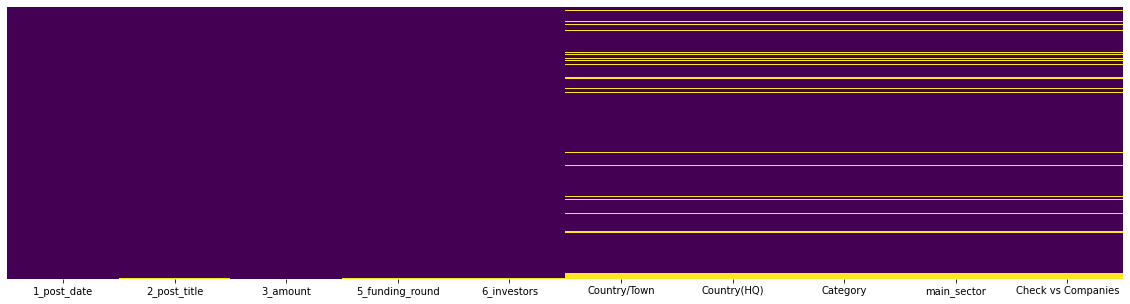

In [65]:
plt.figure(figsize=(20,5))
sns.heatmap(deals_list_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.plot

In [66]:
deals_list_df['2_post_title'].isna().sum()

3

In [68]:
# deals_list_df['2_post_title'].unique()

In [71]:
deals_list_df['2_post_title'].dropna()

0                                 biNu
1                                 biNu
2                              AllLife
3       Bridge International Academies
4                                 biNu
                     ...              
1273                         Career180
1274                        Yebo Fresh
1275                            Dabchy
1276                 Sesi Technologies
1277                      Maungo Craft
Name: 2_post_title, Length: 1276, dtype: object

In [72]:
deals_list_df['2_post_title'].isna().sum()

3

In [81]:
ws_df =deals_list_df.dropna() 

In [82]:
ws_df

,1_post_date,2_post_title,3_amount,5_funding_round,6_investors,Country/Town,Country(HQ),Category,main_sector,Check vs Companies
1,2008-11-01,biNu,400000,Angel,Undisclosed,Australia,Australia,Mobile Internet,Information Technology,biNu
2,2009-12-03,AllLife,6000000,Private Equity,LeapFrog Investments,South Africa,South Africa,"Insurance, InsurTech",Financial Services,AllLife
5,2010-08-20,Kopo Kopo,75000,Seed,First Light Ventures,Kenya,Kenya,"Enterprise Software, Financial Services, Infor...",Financial Services,Kopo Kopo
6,2010-09-30,Paga,700000,Seed,Tim Draper,Nigeria,Nigeria,"Money Transfer, Airtime, Bill Payments, and SM...",Financial Services,Paga
7,2010-12-01,Wuzzuf,150000,Grant,Undisclosed,Egypt,Egypt,"Information Services, Information Technology, ...",Recruitment,Wuzzuf
...,...,...,...,...,...,...,...,...,...,...
1246,2019-04-01,Jumia Group,56000000,Corporate Round,Mastercard,Nigeria,Nigeria,"E-Commerce, Internet, Shopping Online",E-Commerce & Retail,Jumia Group
1247,2018-12-15,MPost,100000,Seed,Takumo Terakubo,Kenya,Kenya,"Mobile, Mobile Apps",Information Technology,MPost
1248,2019-09-02,Livestock Wealth,131000,Debt Financing,AlphaCode,South Africa,South Africa,"Agriculture, Crowdfunding",Financial Services,Livestock Wealth
1249,2019-09-02,Zande Africa,654000,Debt Financing,AlphaCode,South Africa,South Africa,"Loan financing, SME financing",Financial Services,Zande Africa


In [83]:
ws_df = ws_df.drop(['Check vs Companies'], axis=1)

In [84]:
#Renaming column names
ws_df.rename(
    columns={"1_post_date": "DATE", "2_post_title": "COMPANYNAME", "3_amount": "AMOUNT", "5_funding_round": "ROUND", "6_investors": "INVESTORS", "Country/Town": "COUNTRY", "Country(HQ)": "COUNTRY(HQ)", "Category": "CATEGORY", "main_sector": "SECTOR"},
    inplace=True,
)

ws

,DATE,COMPANYNAME,AMOUNT,ROUND,INVESTORS,COUNTRY,COUNTRY(HQ),CATEGORY,SECTOR
1,2008-11-01,biNu,400000,Angel,Undisclosed,Australia,Australia,Mobile Internet,Information Technology
2,2009-12-03,AllLife,6000000,Private Equity,LeapFrog Investments,South Africa,South Africa,"Insurance, InsurTech",Financial Services
5,2010-08-20,Kopo Kopo,75000,Seed,First Light Ventures,Kenya,Kenya,"Enterprise Software, Financial Services, Infor...",Financial Services
6,2010-09-30,Paga,700000,Seed,Tim Draper,Nigeria,Nigeria,"Money Transfer, Airtime, Bill Payments, and SM...",Financial Services
7,2010-12-01,Wuzzuf,150000,Grant,Undisclosed,Egypt,Egypt,"Information Services, Information Technology, ...",Recruitment
...,...,...,...,...,...,...,...,...,...
1246,2019-04-01,Jumia Group,56000000,Corporate Round,Mastercard,Nigeria,Nigeria,"E-Commerce, Internet, Shopping Online",E-Commerce & Retail
1247,2018-12-15,MPost,100000,Seed,Takumo Terakubo,Kenya,Kenya,"Mobile, Mobile Apps",Information Technology
1248,2019-09-02,Livestock Wealth,131000,Debt Financing,AlphaCode,South Africa,South Africa,"Agriculture, Crowdfunding",Financial Services
1249,2019-09-02,Zande Africa,654000,Debt Financing,AlphaCode,South Africa,South Africa,"Loan financing, SME financing",Financial Services


In [80]:
#function to shorten amount values, by reprenting them in millions
shorten = lambda x: str(round(x/1000000, 1)) + 'M'

In [86]:
ws_df['AMOUNT'] = ws_df['AMOUNT'].apply(shorten)

In [87]:
ws_df.head()

,DATE,COMPANYNAME,AMOUNT,ROUND,INVESTORS,COUNTRY,COUNTRY(HQ),CATEGORY,SECTOR
1,2008-11-01,biNu,0.4M,Angel,Undisclosed,Australia,Australia,Mobile Internet,Information Technology
2,2009-12-03,AllLife,6.0M,Private Equity,LeapFrog Investments,South Africa,South Africa,"Insurance, InsurTech",Financial Services
5,2010-08-20,Kopo Kopo,0.1M,Seed,First Light Ventures,Kenya,Kenya,"Enterprise Software, Financial Services, Infor...",Financial Services
6,2010-09-30,Paga,0.7M,Seed,Tim Draper,Nigeria,Nigeria,"Money Transfer, Airtime, Bill Payments, and SM...",Financial Services
7,2010-12-01,Wuzzuf,0.1M,Grant,Undisclosed,Egypt,Egypt,"Information Services, Information Technology, ...",Recruitment


In [88]:
ws_df.to_csv('deals_list.csv', index=True)